# Import required libraries

In [3]:
import pandas as pd
import sklearn.model_selection as skms
import sklearn.metrics as skmt
import matplotlib.pyplot as plt
import numpy as np

# Utilities functions

Function *compute_confusion_matrix* compute and show the confusion matrix

In [4]:
def compute_confusion_matrix(sufix,y_test, y_pred):

    labels = [False, True]

    # Compute the confusion matrix
    conf_matrix = skmt.confusion_matrix(y_test, y_pred, labels=labels)
    print(f"[{sufix}]confusion matrix:\n",conf_matrix)

    if len(conf_matrix[0]) == 1:
        print("Skipping ConfusionMatrixDisplay because a single label was found in 'y_true' and 'y_pred'.")
        return

    # Create a display object for the confusion matrix
    disp = skmt.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Granted", "Granted"])

    # Plot the confusion matrix
    disp.plot(cmap=plt.cm.Blues, values_format=".0f")
    plt.title(f"[{sufix}] Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

Function *evaluate_classifier* return Accuracy and Balanced Accuracy scores, and the confusion matrix

In [5]:
def evaluate_classifier(y_test, y_pred):
    # Compute and print Accuracy
    accuracy_score = skmt.accuracy_score(y_test, y_pred)
    print('Accuracy: %.2f' % (accuracy_score*100))

    # Compute and print Balanced Accuracy
    balanced_accuracy = skmt.balanced_accuracy_score(y_test, y_pred)
    print('Balanced Accuracy: %.2f' % (balanced_accuracy*100))

    # Compute and show confusion matrix
    compute_confusion_matrix('General',y_test, y_pred)

## Load dataset

In [29]:
dataset_ulr = 'https://raw.githubusercontent.com/leticiaarco/practical_ethical_ai_resources/refs/heads/main/scholarship.csv'
data = pd.read_csv(dataset_ulr)
data.head()
df = pd.DataFrame(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   salary       120 non-null    float64
 1   gender       120 non-null    object 
 2   married      120 non-null    object 
 3   achievement  120 non-null    float64
 4   scholarship  120 non-null    bool   
dtypes: bool(1), float64(2), object(2)
memory usage: 4.0+ KB


## Handle data

Transform feature values

In [30]:
transformed_data = data

transformed_data['gender'] = transformed_data['gender'].map({
    'F':1,
    'M':0,
})

transformed_data['married'] = transformed_data['married'].map({
    'Y':1,
    'N':0,
})

Split dataset by predictive features (X) and objective feature (y)

In [31]:
X = transformed_data.drop('scholarship', axis=1)
y = transformed_data['scholarship']

Split dataset in train and test sets

In [33]:
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.3, random_state=0)

# Exercise 2.1: Train Random Forest and ask the model to classify two new applicants

## Initialize, fit, train, test, and evaluate Random Forest

Import

In [34]:
from sklearn.ensemble import RandomForestClassifier

Initialize and fit Random Forest

In [35]:
# Initialize Random Forest
rfc = RandomForestClassifier(random_state=2)

# Fit Random Forest on the train set
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=2)

Make predictions and evaluate results

Accuracy: 94.44
Balanced Accuracy: 75.00
[General]confusion matrix:
 [[32  0]
 [ 2  2]]


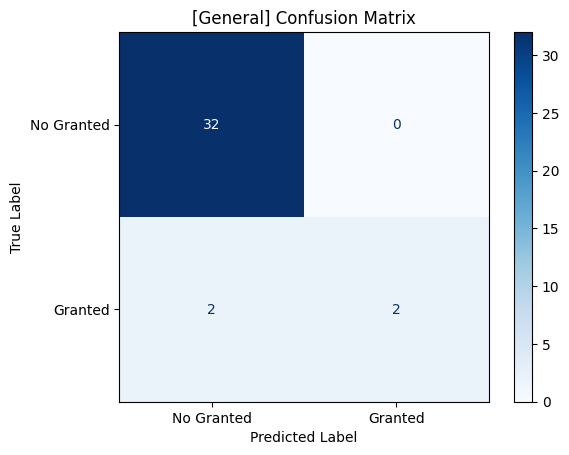

In [36]:
# Make predictions on test set
y_pred = rfc.predict(X_test)

# Compute accuracy, balance accuracy and confusion matrix
evaluate_classifier(y_test, y_pred)

## Make predictions for new applicants

In [40]:
feature_names = X_train.columns.tolist()

Make predictions for the new applicant: Salary=35760, Gender=Female, Married=No, Achievement=19

In [41]:
# New applicant: Salary=35760, Gender=Female, Married=No, Achievement=19
new_record = np.array([[35760.0, 1, 0, 19]])
new_record_df = pd.DataFrame(new_record, columns=feature_names)

# Apply the classifier to the new record to get a prediction
prediction = rfc.predict(new_record_df)

# Print the predicted class for the new record
print("Predicted class:", prediction[0])


Predicted class: True


Make predictions for the new applicant: Salary=35760, Gender=Female, Married=Yes, Achievement=18

In [43]:
# New applicant: Salary=35760, Gender=Female, Married=Yes, Achievement=18
new_record = np.array([[35760.0, 1, 1, 18]])
new_record_df = pd.DataFrame(new_record, columns=feature_names)

# Apply the classifier to the new record to get a prediction
prediction = rfc.predict(new_record_df)

# Print the predicted class for the new record
print("Predicted class:", prediction[0])

Predicted class: False


# Exercise 2.3: Play with the parameter settings to improve results

Import

In [58]:
import tensorflow.keras.models as tkm
import tensorflow.keras.layers as tkl

Training occurs over epochs, and each epoch is split into batches
<br>
**Epoch**: One pass through all of the rows in the training dataset
<br>
**Batch**: One or more samples considered by the model within an epoch before weights are updated

**Original setting:** **12 neurons** in the first and **8 neurons** in the second hiddden layers, **150 number of epochs**, and **batch size 10**

In [ ]:
# Initialize keras sequential model
model = tkm.Sequential()
model.add(tkl.Input(shape=(4,)))
model.add(tkl.Dense(12, activation='relu'))
model.add(tkl.Dense(8, activation='relu'))
model.add(tkl.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model on the trainset (epochs=150, batch_size=10 )
model.fit(X_train, y_train, epochs=150, batch_size=10)

# Evaluate keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9529 - loss: 110.9089  
Epoch 2/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9043 - loss: 164.2988 
Epoch 3/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9533 - loss: 29.0866    
Epoch 4/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6863 - loss: 29.2056 
Epoch 5/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9479 - loss: 15.7761    
Epoch 6/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9301 - loss: 17.8864 
Epoch 7/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8964 - loss: 6.6088  
Epoch 8/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9491 - loss: 11.4646    
Epoch 9/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9316 - loss: 14.5950    
Epoch 10/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7965 - loss: 12.7602 
Epoch 11/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9534 - loss: 12.0236    
Epoch 12/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accur

**Increase the number of epochs:** number of epochs = 1000

In [65]:
# Fit the model on the trainset (epochs=1000, batch_size=10 )
model.fit(X_train, y_train, epochs=1000, batch_size=10)

# Evaluate keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9076 - loss: 1.0611 
Epoch 2/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9470 - loss: 2.4266     
Epoch 3/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8273 - loss: 1.4000 
Epoch 4/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8464 - loss: 0.6921 
Epoch 5/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8116 - loss: 0.8695 
Epoch 6/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9445 - loss: 3.8198     
Epoch 7/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8700 - loss: 1.6963 
Epoch 8/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7453 - loss: 4.3140 
Epoch 9/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9041 - loss: 0.4352 
Epoch 10/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9131 - loss: 3.1239 
Epoch 11/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8188 - loss: 1.9696 
Epoch 12/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

**Increase batch size:** batch size = 80

In [66]:
# Fit the model on the trainset (epochs=150, batch_size=80)
model.fit(X_train, y_train, epochs=150, batch_size=80)

# Evaluate keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9274 - loss: 2.4563  
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9274 - loss: 2.4545 
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9274 - loss: 1.7934 
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9357 - loss: 0.4799 
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5685 - loss: 3.3806 
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9395 - loss: 0.5638
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9357 - loss: 2.6101
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9274 - loss: 1.9065
Epoch 9/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6853 - loss: 2.1895
Epoch 10/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7942 - loss: 1.1607
Epoch 11/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9274 - loss: 0.8910 
Epoch 12/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9274 -

**Increase the number of neurons per hidden layers:**  24 neurons in the first and 12 neurons in the second hiddden layers

In [67]:
# Initialize keras sequential model
model = tkm.Sequential()
model.add(tkl.Input(shape=(4,)))
model.add(tkl.Dense(24, activation='relu'))
model.add(tkl.Dense(12, activation='relu'))
model.add(tkl.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model on the trainset (epochs=150, batch_size=10 )
model.fit(X_train, y_train, epochs=150, batch_size=10)

# Evaluate keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8500 - loss: 52.1293
Epoch 2/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9401 - loss: 5.0621 
Epoch 3/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9255 - loss: 15.5190    
Epoch 4/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9361 - loss: 8.1244     
Epoch 5/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9001 - loss: 2.3780 
Epoch 6/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9526 - loss: 2.7003     
Epoch 7/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9141 - loss: 1.3273      
Epoch 8/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8905 - loss: 10.5884 
Epoch 9/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9251 - loss: 11.6437 
Epoch 10/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9551 - loss: 3.8516     
Epoch 11/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8157 - loss: 3.8286     
Epoch 12/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/st

**Setting with all suggested modifications:** **24 neurons** in the first and **12 neurons** in the second hiddden layers, **1000 number of epochs**, and **batch size 80**

In [68]:
# Initialize keras sequential model
model = tkm.Sequential()
model.add(tkl.Input(shape=(4,)))
model.add(tkl.Dense(24, activation='relu'))
model.add(tkl.Dense(12, activation='relu'))
model.add(tkl.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model on the trainset (epochs=1000, batch_size=80 )
model.fit(X_train, y_train, epochs=1000, batch_size=80)

# Evaluate keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0726 - loss: 2245.4038
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0685 - loss: 1775.7916 
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0726 - loss: 1290.9027 
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0726 - loss: 824.9418
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0726 - loss: 349.4591 
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9274 - loss: 3.6159 
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9274 - loss: 16.8839 
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9274 - loss: 27.5505 
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9274 - loss: 36.1797
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9274 - loss: 43.1820 
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9274 - loss: 48.8672 
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/